# Gaussian Process Priors

A Gaussian process represents a distribution over functions by specifying a multivariate normal (Gaussian) distribution over all possible function values. It is possible to easily manipulate Gaussian distributions to find the distribution of one function value based on the values of any set of other values. In other words, if we observe a set of points, then we can condition on these points and infer a distribution over what the value of the function might look like at any other input. How we model the correlations between these points is determined by the covariance function and is what defines the generalization properties of the Gaussian process. While it takes time to get used to Gaussian processes, they are easy to work with, have many applications, and help us understand and develop other model classes, like neural networks.

#### Definition

A Gaussian process is defined as _a collection of random variables, any finite number of which have a joint Gaussian distribution_. If a function $f(x)$ is a Gaussian process, with _mean function_ $m(x)$ and _covariance function_ or _kernel_ $k(x,x′)$, $f(x)∼GP(m,k)$, then any collection of function values queried at any collection of input points x (times, spatial locations, image pixels, etc.), has a joint multivariate Gaussian distribution with mean vector $μ$ and covariance matrix $K: f(x_1),…,f(x_n)∼N(μ,K)$, where $μ_i=E[f(x_i)]=m(x_i)$ and $K_{ij}=Cov(f(x_i),f(x_j))=k(x_i,x_j)$.

This definition may seem abstract and inaccessible, but Gaussian processes are in fact very simple objects. Any function
$$
f(x)=w^T \phi(x)=\langle w, \phi(x) \rangle
$$
with $w$ drawn from a Gaussian (normal) distribution, and ϕ being any vector of basis functions, for example $\phi(x)=(1,x,x^2,...,x^d)^⊤$, is a Gaussian process.

#### A simple Gaussian Process

Suppose $f(x)=w_0+w_1 x$, and $w_0,w_1∼N(0,1)$, with $w0,w1,x$ all in one dimension. We can equivalently write this function as the inner product $f(x)=(w0,w1)(1,x)^⊤$. In equation above, $w=(w0,w1)^⊤$ and $\phi(x)=(1,x)^⊤$.

For any x, f(x) is a sum of two Gaussian random variables. Since Gaussians are closed under addition, f(x) is also a Gaussian random variable for any x. In fact, we can compute for any particular x that f(x) is $N(0,1+x^2)$. Similarly, the joint distribution for any collection of function values, $(f(x_1),…,f(x_n))$, for any collection of inputs $x_1,…,x_n$, is a multivariate Gaussian distribution. Therefore f(x) is a Gaussian process.

In short, f(x) is a _random function_, or a _distribution over functions_. We can gain some insights into this distribution by repeatedly sampling values for w0,w1, and visualizing the corresponding functions f(x), which are straight lines with slopes and different intercepts:

In [1]:
import numpy as np

In [2]:
def linear_func(x: np.ndarray, n_samples: int) -> np.ndarray:
    """
    Return output of n_samples linear functions that takes x as input.
    Args:
        x: array of input values
        n_samples: number of linear functions to generate
    Returns:
        array of output values with shape (n_samples, x.shape[0])   
    """
    preds = np.zeros((n_samples, x.shape[0]))
    for i in range(n_samples):
        # randomly generate weights with normal distribution with mean 0 and std 1
        w = np.random.normal(0, 1, 2)
        # define linear function
        y = w[0] + w[1] * x
        preds[i, :] = y
    return preds


In [3]:
x_points = np.linspace(-5, 5, 50)
output = linear_func(x_points, 10)

In [4]:
# define lower and upper bounds for the output
lower_bound = -2 * np.sqrt((1 + x_points**2))
upper_bound = 2 * np.sqrt((1 + x_points**2))

Text(0.5, 1.0, 'Linear functions with bounds')

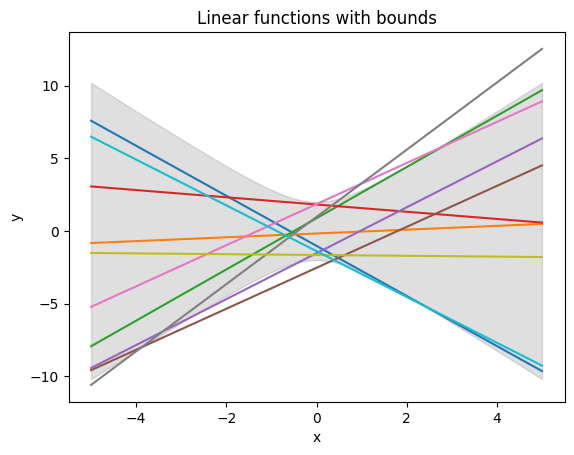

In [6]:
# plot the output at each x value along with the bounds
import matplotlib.pyplot as plt

plt.figure()
plt.fill_between(x_points, lower_bound, upper_bound, color='gray', alpha=0.25)
for i in range(output.shape[0]):
    plt.plot(x_points, output[i, :])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear functions with bounds')